In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
# Load the data
df = pd.read_csv(r'C:\Users\44757\Documents\GitHub\IntrotoAI\cleaned_data.csv')


Epoch 1/11


C:\Users\44757\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8903/8903 ━━━━━━━━━━━━━━━━━━━━ 9s 845us/step - accuracy: 0.9438 - loss: 0.1750 - val_accuracy: 0.9473 - val_loss: 0.1558
Epoch 2/11
8903/8903 ━━━━━━━━━━━━━━━━━━━━ 7s 829us/step - accuracy: 0.9458 - loss: 0.1539 - val_accuracy: 0.9468 - val_loss: 0.1559
Epoch 3/11
8903/8903 ━━━━━━━━━━━━━━━━━━━━ 7s 830us/step - accuracy: 0.9455 - loss: 0.1530 - val_accuracy: 0.9460 - val_loss: 0.1503
Epoch 4/11
8903/8903 ━━━━━━━━━━━━━━━━━━━━ 7s 834us/step - accuracy: 0.9466 - loss: 0.1504 - val_accuracy: 0.9473 - val_loss: 0.1562
Epoch 5/11
8903/8903 ━━━━━━━━━━━━━━━━━━━━ 7s 825us/step - accuracy: 0.9457 - loss: 0.1524 - val_accuracy: 0.9465 - val_loss: 0.1526
Epoch 6/11
8903/8903 ━━━━━━━━━━━━━━━━━━━━ 8s 886us/step - accuracy: 0.9458 - loss: 0.1514 - val_accuracy: 0.9464 - val_loss: 0.1521
Epoch 7/11
8903/8903 ━━━━━━━━━━━━━━━━━━━━ 8s 854us/step - accuracy: 0.9459 - loss: 0.1504 - val_accuracy: 0.9476 - val_loss: 0.1562
Epoch 8/11
8903/8903 ━━━━━━━━━━━━━━━━━━━━ 8s 888us/step - accuracy: 0.9473 - loss: 0.14

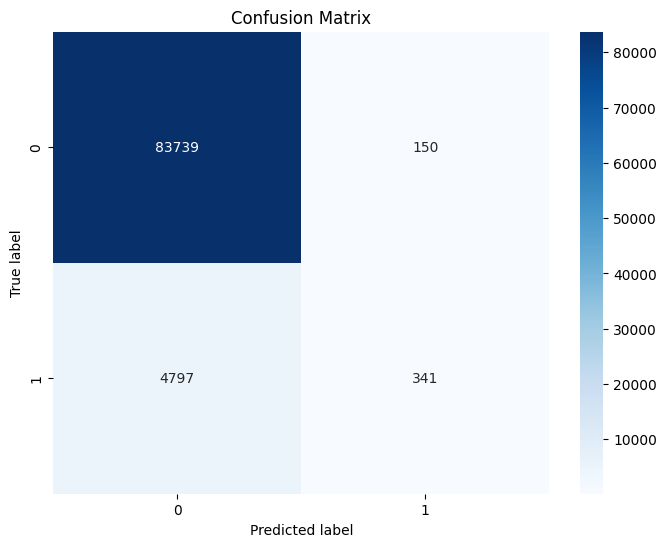

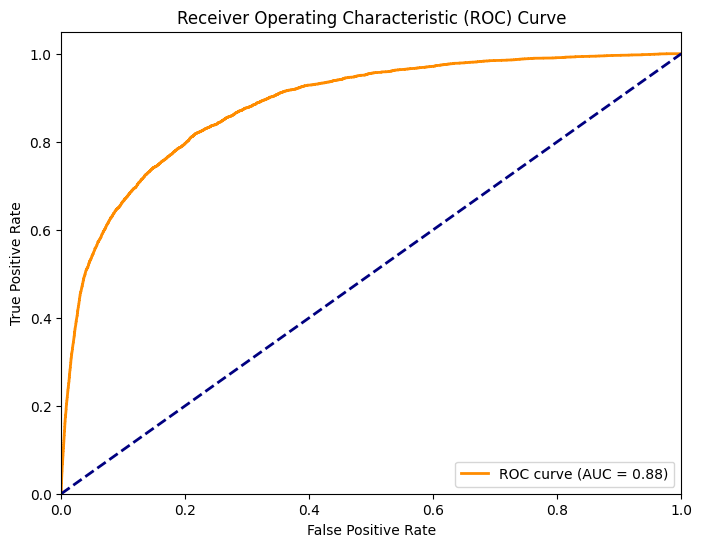

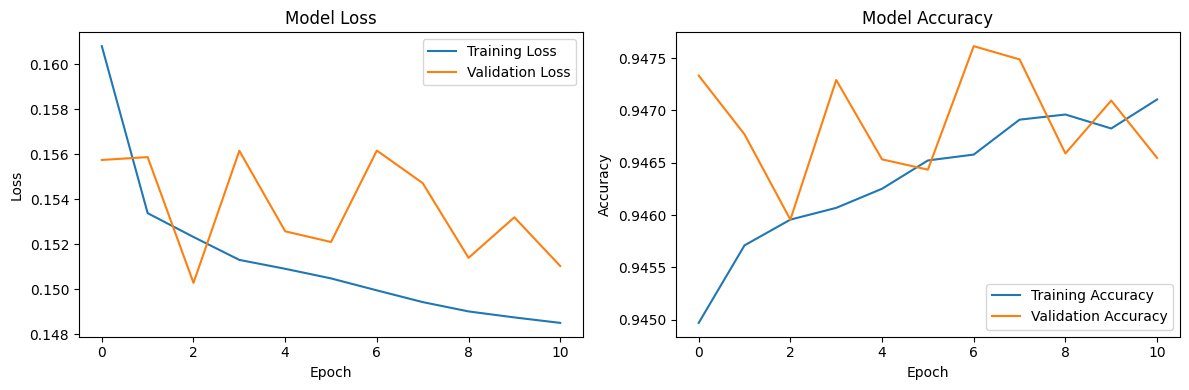


Additional Metrics:
Accuracy: 0.9444
Precision: 0.9313
Recall: 0.9444
F1 Score: 0.9222
AUC-ROC: 0.8838


In [25]:
# Define features
numeric_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'WeightInKilograms', 'HeightInMeters']
categorical_features = ['State', 'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
                        'RemovedTeeth', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 
                        'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 
                        'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 
                        'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 
                        'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 
                        'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers', 'HIVTesting', 
                        'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
target = 'HadHeartAttack'

# Prepare X and y
X = df[numeric_features + categorical_features]
y = df[target]

# Encode the target variable
y = pd.get_dummies(y, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

# Fit the preprocessor and transform the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Get the number of features after preprocessing
n_features = X_train_preprocessed.shape[1]

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(n_features,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_preprocessed, y_train,
    epochs=11,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model
y_pred_proba = model.predict(X_test_preprocessed)
y_pred = (y_pred_proba > 0.5).astype(int)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nAdditional Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")